In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = np.array(train)
test = np.array(test)
y_tr = train[:,0].T
# y_t = test[:,0].T
X_tr = (train[:,1:].T )/ 255.
X_t = (test.T )/ 255.
#test = X_t[0].T.reshape(784,1)
print(train.shape)


(42000, 785)


In [3]:
train.shape

(42000, 785)

In [4]:
def init_params(l2):
    W1 = np.random.rand(l2,784) -0.5
    W2 = np.random.rand(10,l2) - 0.5
    b1 = np.zeros((256,1))
    b2 = np.zeros((10,1))
    return W1,b1,W2,b2

def relu(z):
    return np.maximum(0,z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(Z1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2
    
def y_data(y):
    up_y = np.zeros((10,y.size))
    for i in range(y.size):
        up_y[y[i]][i] = 1 
    return up_y

def d_relu(Z):
    return Z>0

def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    y= y_data(Y)
    dz2 = A2 - y
    dw2 = dz2.dot(A1.T)/Y.size
    db2 = np.sum(dz2)/Y.size
    dz1 = W2.T.dot(dz2)*d_relu(Z1)
    dw1 = dz1.dot(X.T)/Y.size
    db1 = np.sum(dz1)/Y.size
    return dw1,db1,dw2,db2

def update_params(w1,dw1,w2,dw2,b1,db1,b2,db2,a):
    w1 = w1 - a*dw1
    b1 = b1 - a*db1
    w2 = w2 - a*dw2
    b2 = b2 - a*db2
    return w1,b1,w2,b2

In [6]:
def pred(A2):
    return np.argmax(A2,axis=0)

def accuracy(predict,y):
    return (np.sum(predict==y)/y.size)

def grad_desc(X,Y,epoch,a):
    w1,b1,w2,b2 = init_params(256)
    for i in range(epoch):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w2,X,Y)
        w1,b1,w2,b2 = update_params(w1,dw1,w2,dw2,b1,db1,b2,db2,a)
        if i%50 ==0:
            print("Iteration: ",i)
            print("Accuracy: ", accuracy(pred(a2),Y))
    return w1,b1,w2,b2


In [7]:
w1,b1,w2,b2 = grad_desc(X_tr,y_tr,1001,0.05)

Iteration:  0
Accuracy:  0.07547619047619047
Iteration:  50
Accuracy:  0.6727619047619048
Iteration:  100
Accuracy:  0.7540476190476191
Iteration:  150
Accuracy:  0.7854761904761904
Iteration:  200
Accuracy:  0.8054523809523809
Iteration:  250
Accuracy:  0.8183095238095238
Iteration:  300
Accuracy:  0.8292380952380952
Iteration:  350
Accuracy:  0.8365476190476191
Iteration:  400
Accuracy:  0.8437619047619047
Iteration:  450
Accuracy:  0.849452380952381
Iteration:  500
Accuracy:  0.8537142857142858
Iteration:  550
Accuracy:  0.8572380952380952
Iteration:  600
Accuracy:  0.8608333333333333
Iteration:  650
Accuracy:  0.8632857142857143
Iteration:  700
Accuracy:  0.8658571428571429
Iteration:  750
Accuracy:  0.8678809523809524
Iteration:  800
Accuracy:  0.8696428571428572
Iteration:  850
Accuracy:  0.8713095238095238
Iteration:  900
Accuracy:  0.8726666666666667
Iteration:  950
Accuracy:  0.8741666666666666
Iteration:  1000
Accuracy:  0.8758333333333334


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = pred(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2,X,y):
    c_img = X[:, index, None]
    prediction = make_predictions(X[:, index, None], W1, b1, W2, b2)
    label = y[index]
    
    print("Label: ", label)
    
    c_img = c_img.reshape((28,28))*255
    plt.gray()
    plt.imshow(c_img, interpolation='nearest')
    plt.show()

    print("Prediction: ", prediction)

Label:  2


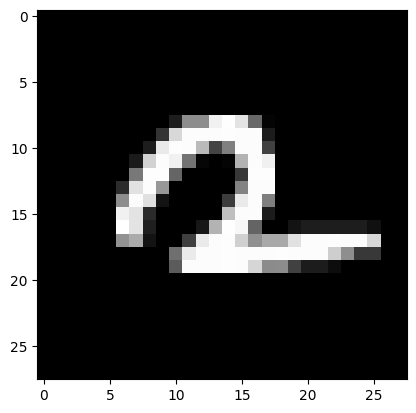

Prediction:  [4]


In [24]:
test_prediction(np.random.randint(0,42000),w1,b1,w2,b2,X_tr,y_tr)

Label:  0.0


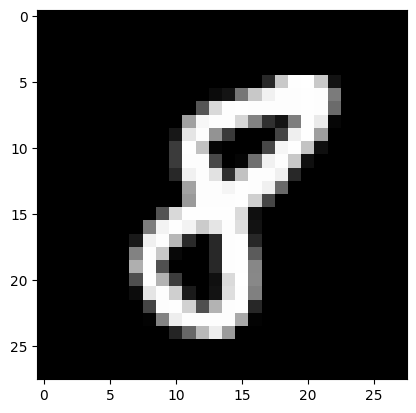

Prediction:  [8]


In [69]:
test_prediction(np.random.randint(0,28000),w1,b1,w2,b2,X_t,np.zeros(28000))